# Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\armin\AppData\Local\Temp\ipykernel_2280\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [106]:
! python -m pip install bokeh

In [107]:
! pip install plotly

In [3]:
import bokeh
import plotly

# Read datasets

In [112]:
# Read json file 
js = pd.read_json('2021.json')

In [3]:
# Convert to CSV
js.to_csv('2021.csv')

In [4]:
divar_2021 = pd.read_csv('2021.csv')

In [5]:
divar_2023 = pd.read_csv('2023.csv')

C:\Users\armin\AppData\Local\Temp\ipykernel_2280\3312842077.py:1: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  divar_2023 = pd.read_csv('2023.csv')


# EDA

In [5]:
divar_2021.head()

,Unnamed: 0,district,token,sub_category,category,business_type,price,credit,rent,title,location,area,year,room,floor,elevator,parking,storage,balcony,agency
0,0,پرند,AYlgrZxh,apartment-sell,residential-sell,personal,2.400000e+08,NaN,NaN,هسا فول واریزی,{},84.0,1399.0,2.0,3.0,False,True,True,NaN,NaN
1,1,ستارخان,AYlUb95t,shop-rent,commercial-rent,personal,NaN,NaN,NaN,15 متر مغازه(زیر همکف) پاساژ طلا و جواهر الماس...,{},15.0,1390.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,الهیه,AYXM8Mkk,office-rent,commercial-rent,personal,NaN,NaN,NaN,فرشته اجاره۶۶متر سنداداری,{},66.0,1397.0,0.0,6.0,True,True,False,NaN,NaN
3,3,فیروزکوه,AYO0uYGH,house-villa-sell,residential-sell,personal,4.000000e+09,NaN,NaN,ویلا باغ زریندشت فیروزکوه,{},1300.0,1395.0,3.0,NaN,NaN,True,True,1.0,NaN
4,4,ورامین,AYlcbu9U,suite-apartment,temporary-rent,personal,NaN,NaN,NaN,اجاره سوییت,{},2000.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, we need to change format of "Price" and " Address"

In [6]:
divar_2023.head()

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
0,153,1393,3,True,True,True,۱ ساعت پیش در تهران، درکه,۱۸٬۳۶۰٬۰۰۰٬۰۰۰ تومان
1,418,1382,4,True,True,True,۱ ساعت پیش در تهران، زعفرانیه,۱۳۰٬۰۰۰٬۰۰۰٬۰۰۰ تومان
2,57,1385,2,False,False,True,۱ ساعت پیش در تهران، جابری,۲٬۶۰۰٬۰۰۰٬۰۰۰ تومان
3,193,1371,3,False,False,True,۱ ساعت پیش در تهران، فرمانیه,۲۳٬۰۰۰٬۰۰۰٬۰۰۰ تومان
4,62,1401,1,True,True,True,۱ ساعت پیش در تهران، دهکده المپیک، بزرگراه همت...,۱٬۴۱۰٬۰۰۰٬۰۰۰ تومان


In [8]:
divar_2023.Price

0         ۱۸٬۳۶۰٬۰۰۰٬۰۰۰ تومان
1        ۱۳۰٬۰۰۰٬۰۰۰٬۰۰۰ تومان
2          ۲٬۶۰۰٬۰۰۰٬۰۰۰ تومان
3         ۲۳٬۰۰۰٬۰۰۰٬۰۰۰ تومان
4          ۱٬۴۱۰٬۰۰۰٬۰۰۰ تومان
                 ...          
94031     ۱۸٬۰۰۰٬۰۰۰٬۰۰۰ تومان
94032     ۱۳٬۸۰۰٬۰۰۰٬۰۰۰ تومان
94033      ۹٬۸۶۰٬۰۰۰٬۰۰۰ تومان
94034      ۶٬۴۳۰٬۰۰۰٬۰۰۰ تومان
94035      ۳٬۱۰۰٬۰۰۰٬۰۰۰ تومان
Name: Price, Length: 94036, dtype: object

In [6]:
# Remove تومان 
divar_2023['foramting_change'] = divar_2023['Price'].apply(lambda x :x.split(' ')[0])

In [7]:
# Remove ","  
divar_2023['foramting_change'] = divar_2023['foramting_change'].apply(lambda x:x.replace('٬',''))

In [8]:
# Find توافقی cases
filter_divar_2023 = divar_2023[divar_2023['foramting_change'] == 'توافقی']

In [9]:
filter_divar_2023

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price,foramting_change
295,80,1399,2,True,True,True,۱ ساعت پیش در تهران، اقدسیه,توافقی,توافقی
704,72,1401,2,True,True,True,۲ ساعت پیش در تهران، مبارک‌آباد بهشتی,توافقی,توافقی
874,460,1401,4,True,True,True,۲ ساعت پیش در تهران، الهیه,توافقی,توافقی
881,935,1400,4,True,True,True,۲ ساعت پیش در تهران، الهیه,توافقی,توافقی
900,418,1401,4,True,True,True,۲ ساعت پیش در تهران، الهیه,توافقی,توافقی
...,...,...,...,...,...,...,...,...,...
88099,120,1400,2,True,True,True,۲ هفته پیش در تهران، سعادت‌آباد,توافقی,توافقی
88513,100,1401,2,True,True,True,۲ هفته پیش در تهران، چیتگر,توافقی,توافقی
88624,160,1395,3,True,True,True,۳ روز پیش در تهران، مرزداران,توافقی,توافقی
91441,360,1400,4,True,True,True,۲ هفته پیش در تهران، پاسداران,توافقی,توافقی


In [10]:
# Replace توافقی price to 0 (mabey we change zero number later)
# divar_2023['foramting_change'] = divar_2023['foramting_change'].apply(lambda x:'0' if x == 'توافقی' else x) 

In [11]:
# Find index them and remove
index_tavafoghi = filter_divar_2023.index
divar_2023.drop(index_tavafoghi,inplace=True)

In [12]:
# There is an error
# The error says It cannot change "Price" to integer
divar_2023['foramting_change'].apply(lambda x:int(x))

ValueError: invalid literal for int() with base 10: 'Price'

In [12]:
# There is one row that have wrong values
for i in divar_2023.iloc[:,:]:
    if i.isalpha():
        print(i)

Area
Construction
Room
Warehouse
Parking
Elevator
Address
Price


In [13]:
index_d = divar_2023[divar_2023['Price'] == 'Price'].index
index_d
# Remove it from dataset
divar_2023.drop(index_d,inplace=True)

In [14]:
# Change format of string numbers to integer 
divar_2023['foramting_change'] = divar_2023['foramting_change'].apply(lambda x:int(x))
divar_2023.drop('Price',axis=1,inplace=True)
divar_2023

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,foramting_change
0,153,1393,3,True,True,True,۱ ساعت پیش در تهران، درکه,18360000000
1,418,1382,4,True,True,True,۱ ساعت پیش در تهران، زعفرانیه,130000000000
2,57,1385,2,False,False,True,۱ ساعت پیش در تهران، جابری,2600000000
3,193,1371,3,False,False,True,۱ ساعت پیش در تهران، فرمانیه,23000000000
4,62,1401,1,True,True,True,۱ ساعت پیش در تهران، دهکده المپیک، بزرگراه همت...,1410000000
...,...,...,...,...,...,...,...,...
94031,181,1393,3,True,True,True,۲ هفته پیش در تهران، جردن,18000000000
94032,121,1400,3,True,True,True,۲ هفته پیش در تهران، اباذر,13800000000
94033,140,1400,3,True,True,True,۲ هفته پیش در تهران، آبشار تهران,9860000000
94034,105,1398,2,True,True,True,۲ هفته پیش در تهران، اوقاف,6430000000


Now the format were changed to integer.

the below code is change name of columns to lower case

In [15]:
# Rename column to Price
divar_2023.rename(columns={'foramting_change':'price','Construction':'year',
                           'Area':'area','Room':'room','Warehouse':'warehouse',
                           'Parking':'parking','Elevator':'elevator','Address':'address'}
                           ,errors='raise',inplace=True)

# Apartment 2021

We just only work with "apartment-sell" part

In [16]:
apartmnet_sell_2021 = divar_2021[divar_2021['sub_category'] == 'apartment-sell'].reset_index()

Here we change the name of columns to same as 2023 dataset

In [17]:
apartmnet_sell_2021.rename(columns={"district":"address"},errors='raise',inplace=True)

In [18]:
# Select just the address 
divar_2023['address'] = divar_2023['address'].apply(lambda x:x.split('،')[1])

In [19]:
# remove some unimportant columns
apartmnet_sell_2021.drop(columns=['Unnamed: 0','index','rent','credit','business_type','agency','balcony','token','location'],inplace=True)

In [20]:
apartmnet_sell_2021.isnull().sum()

address             0
sub_category        0
category            0
price           70682
title               0
area                3
year               25
room                6
floor            7516
elevator         7501
parking          7497
storage          7526
dtype: int64

In [21]:
housing_data = apartmnet_sell_2021.copy()
housing_data.dropna(subset=['price','year'],inplace=True)

In [22]:
# apartmnet_sell_2021.groupby('address')['price'].size()
# apartmnet_sell_2021.groupby('address')['price'].count()

In [23]:
# apartmnet_sell = apartmnet_sell_2021.copy()
# apartmnet_sell[(apartmnet_sell['price'].isnull()) & (apartmnet_sell['parking'].isnull())]
# apartmnet_sell[(apartmnet_sell['year'] == 1380) & (apartmnet_sell['address']=='تجریش')]
# apartmnet_sell['price'] = apartmnet_sell['price'].fillna(apartmnet_sell.groupby(['address','year'])['price'].transform('median'))
# apartmnet_sell[(apartmnet_sell['address'].isnull())]
# apartmnet_sell[(apartmnet_sell['price'].isnull())]
# apartmnet_sell.isnull().sum()

In [24]:
divar_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93790 entries, 0 to 94035
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area       93790 non-null  object
 1   year       93790 non-null  object
 2   room       93790 non-null  object
 3   warehouse  93790 non-null  object
 4   parking    93790 non-null  object
 5   elevator   93790 non-null  object
 6   address    93790 non-null  object
 7   price      93790 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 6.4+ MB


In [25]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124811 entries, 0 to 195474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   address       124811 non-null  object 
 1   sub_category  124811 non-null  object 
 2   category      124811 non-null  object 
 3   price         124811 non-null  float64
 4   title         124811 non-null  object 
 5   area          124811 non-null  float64
 6   year          124811 non-null  float64
 7   room          124811 non-null  float64
 8   floor         123006 non-null  float64
 9   elevator      123006 non-null  object 
 10  parking       123008 non-null  object 
 11  storage       123008 non-null  object 
dtypes: float64(5), object(7)
memory usage: 12.4+ MB


# Pre-processing

In [26]:
# Fill null value 
housing_data.fillna({'floor':0},inplace=True)
housing_data.fillna({'room':0},inplace=True)

In [27]:
# change the format of these columns to integer for 2021 dataset
housing_data['area'] = housing_data['area'].apply(lambda x:int(x))
housing_data['floor'] = housing_data['floor'].apply(lambda x:int(x))
housing_data['room'] = housing_data['room'].apply(lambda x:int(x))
housing_data['year'] = housing_data['year'].apply(lambda x:int(x))
housing_data['price'] = housing_data['price'].apply(lambda x:int(x))

In [28]:
# change format for 2023 dataset
divar_2023['room'] = divar_2023['room'].apply(lambda x:int(x))
divar_2023['year'] = divar_2023['year'].apply(lambda x:int(x))
divar_2023['area'] = divar_2023['area'].apply(lambda x:int(x))

In [29]:
housing_data.reset_index(inplace=True)
housing_data.drop(columns=['index'],inplace=True)

In [30]:
divar_2023['address'] = divar_2023['address'].astype(str).str.strip()
housing_data['address'] = housing_data['address'].astype(str).str.strip()

##### Comparing price changes in different areas of Tehran and finding areas with the highest price growth

In [31]:
! pip install arabic-reshaper
! pip install python-bidi

In [32]:
# import some libaries for writing Persian format in right way
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [33]:
# Group by based on address and then get median of price for each group
median_2023 = divar_2023.groupby('address')['price'].median().reset_index()
median_2021 = housing_data.groupby('address')['price'].median().reset_index()

Why median?

+ Because it is not sensitive to outliers and it is possible to give a better limit for these data than the average

In [34]:
# Rename columns
median_2021.rename(columns={'price':'median_price'},inplace=True)
median_2023.rename(columns={'price':'median_price'},inplace=True)
median_2023['median_price'] = median_2023['median_price'].apply(lambda x:int(x))
median_2021['median_price'] = median_2021['median_price'].apply(lambda x:int(x))

In [35]:
# Merge two dataset on address column 
# Using inner join (just get intersection for both dataset)
merge_dataset = pd.merge(median_2021,median_2023,on='address',how='inner',suffixes=['_2021','_2023'])

We want intersection because we don't need some areas that are not in another dataset. We want to compare the common areas

Now we get Price Growth:

In [36]:
merge_dataset['price_growth'] = round(((merge_dataset['median_price_2023'] - merge_dataset['median_price_2021']) / merge_dataset['median_price_2021']) * 100,2)
merge_dataset_sorted = merge_dataset.sort_values(by='price_growth',ascending=False).reset_index()
merge_dataset_sorted.drop(columns='index',inplace=True)

In [37]:
merge_dataset_sorted

,address,median_price_2021,median_price_2023,price_growth
0,حسن‌آباد,480000000,3425000000,613.54
1,شهرک پاسداران,2129600000,15160000000,611.87
2,شهرک گلها,1450000000,9950000000,586.21
3,ملک‌آباد,677500000,3875000000,471.96
4,شهرک مسلمین,737500000,3950000000,435.59
...,...,...,...,...
330,سیروس,1325000000,2020000000,52.45
331,شهرک غزالی,2327000000,3150000000,35.37
332,چیتگر,2100000000,2570000000,22.38
333,حصار بوعلی,37000000000,32000000000,-13.51


In [38]:
top_10 = merge_dataset_sorted.head(10).set_index('address')

In [39]:
top_10

,median_price_2021,median_price_2023,price_growth
address,,,
حسن‌آباد,480000000,3425000000,613.54
شهرک پاسداران,2129600000,15160000000,611.87
شهرک گلها,1450000000,9950000000,586.21
ملک‌آباد,677500000,3875000000,471.96
شهرک مسلمین,737500000,3950000000,435.59
مرادآباد,2680000000,12825000000,378.54
ایران,1974999999,9000000000,355.70
پامنار,645000000,2800000000,334.11
شهادت,975000000,4100000004,320.51


As it is known, we see the first 10 regions of Tehran with the highest growth rate

In [40]:
address_list = top_10.index.to_list()
persian_labels = [get_display(reshape(label)) for label in address_list]


In [420]:
import plotly.graph_objects as go

# Create a line plot
fig = go.Figure()

# Add 2021 price line
fig.add_trace(go.Scatter(
    x=top_10.index,
    y=top_10['median_price_2021'],
    mode='lines+markers',
    name='2021 Price',
    line=dict(color='red')
))

# Add 2023 price line
fig.add_trace(go.Scatter(
    x=top_10.index,
    y=top_10['median_price_2023'],
    mode='lines+markers',
    name='2023 Price',
    line=dict(color='blue')
))

# Update layout
fig.update_layout(
    title='Median Prices in Different Neighborhoods (2021 vs 2023)',
    xaxis_title='Neighborhoods',
    yaxis_title='Median Price (Toman)',
    legend_title='Year',
    xaxis=dict(tickmode='array', tickvals=top_10.index),
    width=1200,
    height=500
)

# Show the plot
fig.show()

### With different budgets, in which areas is it better to make purchases in order to earn more profit.

In [42]:
budget_merge_dataset = merge_dataset.copy()

We make for categories budget to compare

In [43]:
pd.cut(budget_merge_dataset['median_price_2023'],4)

0       (1058600000.0, 11450000000.0]
1       (1058600000.0, 11450000000.0]
2      (21800000000.0, 32150000000.0]
3       (1058600000.0, 11450000000.0]
4       (1058600000.0, 11450000000.0]
                    ...              
330     (1058600000.0, 11450000000.0]
331    (11450000000.0, 21800000000.0]
332     (1058600000.0, 11450000000.0]
333     (1058600000.0, 11450000000.0]
334    (11450000000.0, 21800000000.0]
Name: median_price_2023, Length: 335, dtype: category
Categories (4, interval[float64, right]): [(1058600000.0, 11450000000.0] < (11450000000.0, 21800000000.0] < (21800000000.0, 32150000000.0] < (32150000000.0, 42500000000.0]]

In [44]:
# label 4 categories based on budget
budget_merge_dataset['budget_category'] = pd.cut(budget_merge_dataset['median_price_2023'],4,labels=['low','medium','high','very high'])

In [45]:
budget_merge_dataset = budget_merge_dataset.sort_values(by='price_growth',ascending=False).reset_index().drop(columns=['index'])

In [46]:
low_budget = budget_merge_dataset[budget_merge_dataset['budget_category'] == 'low']
medium_budget = budget_merge_dataset[budget_merge_dataset['budget_category'] == 'medium']
high_budget = budget_merge_dataset[budget_merge_dataset['budget_category'] == 'high']
very_high_budget = budget_merge_dataset[budget_merge_dataset['budget_category'] == 'very high']

In [47]:
low_budget.head(9)

,address,median_price_2021,median_price_2023,price_growth,budget_category
0,حسن‌آباد,480000000,3425000000,613.54,low
2,شهرک گلها,1450000000,9950000000,586.21,low
3,ملک‌آباد,677500000,3875000000,471.96,low
4,شهرک مسلمین,737500000,3950000000,435.59,low
6,ایران,1974999999,9000000000,355.70,low
7,پامنار,645000000,2800000000,334.11,low
8,شهادت,975000000,4100000004,320.51,low
9,حصارک,950000000,3950000008,315.79,low
10,ابن بابویه,917500000,3700000000,303.27,low


In [48]:
address_list = low_budget['address'].head(10).to_list()
persian_labels = [get_display(reshape(label)) for label in address_list]

The best areas to buy a house with a **low** budget that give the most profit:

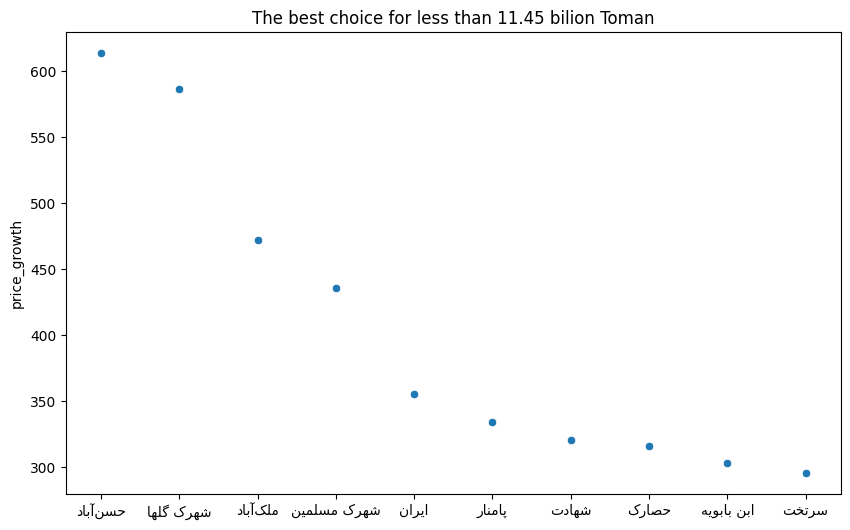

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(low_budget.head(10),x=persian_labels,y='price_growth')
plt.title(
    'The best choice for less than 11.45 bilion Toman'
)
plt.show()

In [50]:
address_list = medium_budget['address'].head(10).to_list()
persian_labels = [get_display(reshape(label)) for label in address_list]

The best areas to buy a house with a **medium** budget that give the most profit

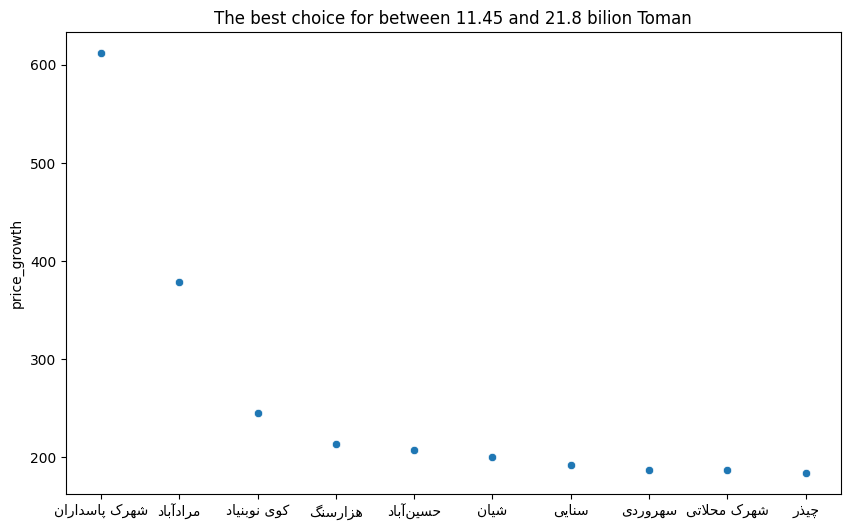

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(medium_budget.head(10),x=persian_labels,y='price_growth')
plt.title(
    'The best choice for between 11.45 and 21.8 bilion Toman'
)
plt.show()

In [52]:
address_list = high_budget['address'].head().to_list()
persian_labels = [get_display(reshape(label)) for label in address_list]

The best areas to buy a house with a **high** budget that give the most profit:

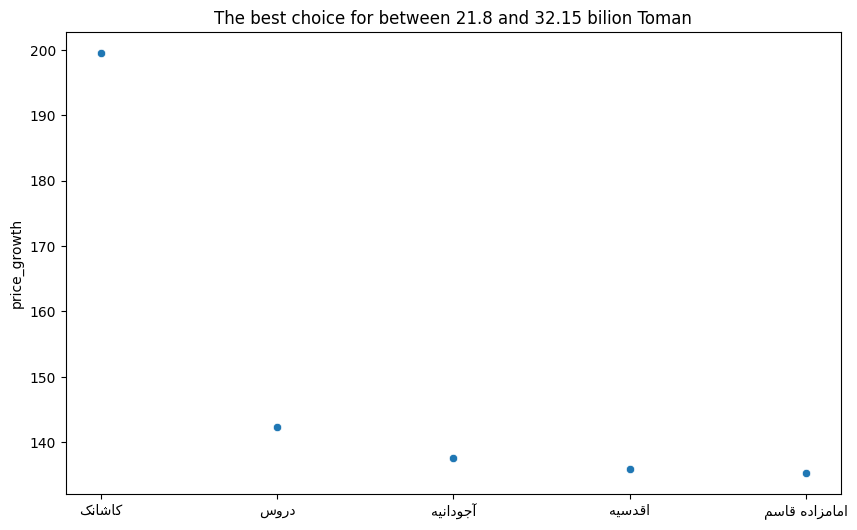

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(high_budget.head(),x=persian_labels,y='price_growth')
plt.title(
    'The best choice for between 21.8 and 32.15 bilion Toman'
)
plt.show()

In [54]:
address_list = very_high_budget['address'].head().to_list()
persian_labels = [get_display(reshape(label)) for label in address_list]

The best areas to buy a house with a **very high** budget that give the most profit:

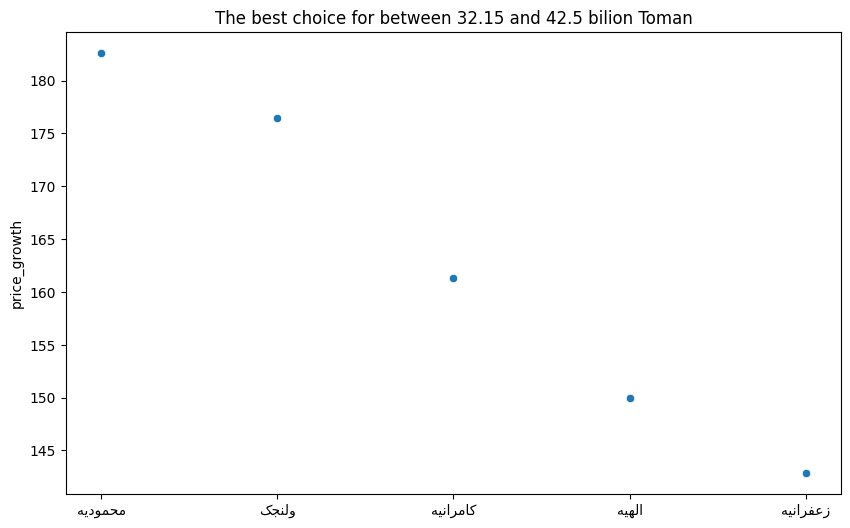

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(very_high_budget.head(),x=persian_labels,y='price_growth')
plt.title(
    'The best choice for between 32.15 and 42.5 bilion Toman'
)
plt.show()

### Regions with the highest number of ads in different years

In [41]:
housing_data = housing_data.reset_index().rename(columns={'index':'id'})
divar_2023 = divar_2023.reset_index().rename(columns={'index':'id'})

In [42]:
states_most_adv_2021 = housing_data.groupby('address')['id'].count()
states_most_adv_2023 = divar_2023.groupby('address')['id'].count()

In [43]:
states_most_adv_2021 = pd.DataFrame(states_most_adv_2021).rename(columns={'id':'adv'}).reset_index()
states_most_adv_2023 = pd.DataFrame(states_most_adv_2023).rename(columns={'id':'adv'}).reset_index()

In [44]:
states_most_adv_2021.sort_values(by='adv',ascending=False,inplace=True)
states_most_adv_2023.sort_values(by='adv',ascending=False,inplace=True)

In [45]:
top_10_adv_2021 = states_most_adv_2021.head(10).reset_index().drop(columns='index')
top_10_adv_2023 = states_most_adv_2023.head(10).reset_index().drop(columns='index')

In the following, I see the areas with the largest number of ads.
Of course, we will display the first ten regions with the largest number of ads for 2023 and 2021

In [46]:
top_10_adv_2023

,address,adv
0,پونک,4593
1,سعادت‌آباد,3563
2,دریاچه شهدای خلیج فارس,2875
3,کوی فردوس,2572
4,چیتگر,2369
5,جیحون,2242
6,پاسداران,2120
7,نیاوران,1894
8,جنت‌آباد جنوبی,1850
9,جنت‌آباد مرکزی,1828


In [47]:
address_list_2023 = top_10_adv_2023['address'].head(10).to_list()
persian_labels_2023 = [get_display(reshape(label)) for label in address_list_2023]
address_list_2021 = top_10_adv_2021['address'].head(10).to_list()
persian_labels_2021 = [get_display(reshape(label)) for label in address_list_2021]

In [48]:
text = get_display(reshape('مناطق تهران با بیشترین آگهی ثبت شده در دیوار در سال 2021'))
x_text = get_display(reshape('مناطق تهران'))

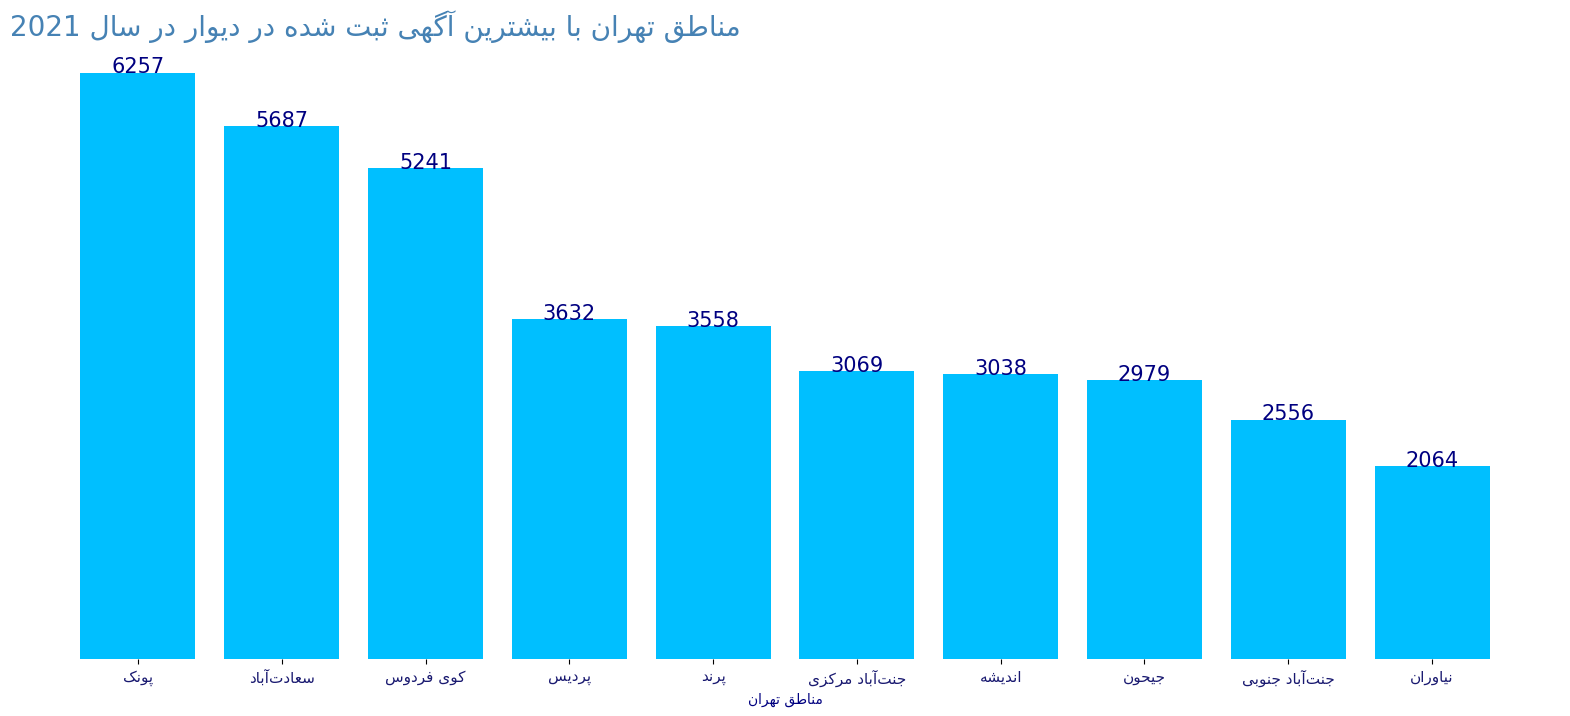

In [49]:
fig = plt.figure(figsize=(20,8))


plt.bar(persian_labels_2021,top_10_adv_2021['adv'],color='deepskyblue')
plt.title(text,loc='left',color='steelblue',size=20)
plt.xlabel(x_text,color='navy')
for i in range(len(top_10_adv_2021)):
    plt.text(i,top_10_adv_2021['adv'][i],top_10_adv_2021['adv'][i],ha='center',color='navy',size=15)
plt.gca().spines[['top','left','right','bottom']].set_visible(False)
plt.yticks([])
plt.xticks(color='midnightblue',size=11)
plt.show()

In [50]:
text = get_display(reshape('مناطق تهران با بیشترین آگهی ثبت شده در دیوار در سال 2023'))
x_text = get_display(reshape('مناطق تهران'))

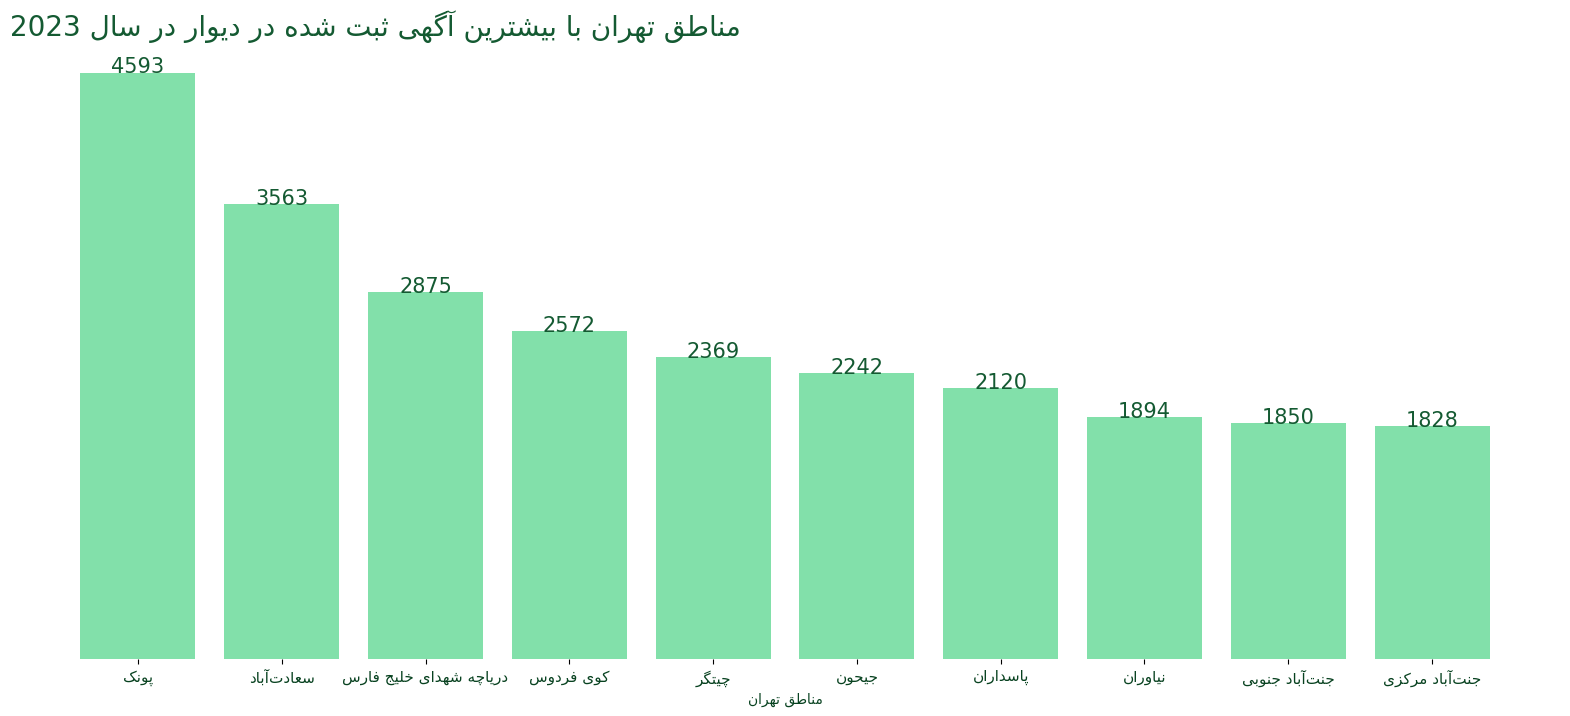

In [51]:
fig = plt.figure(figsize=(20,8))


plt.bar(persian_labels_2023,top_10_adv_2023['adv'],color='#82e0aa')
plt.title(text,loc='left',color='#145a32',size=20)
plt.xlabel(x_text,color='#084220')
for i in range(len(top_10_adv_2023)):
    plt.text(i,top_10_adv_2023['adv'][i],top_10_adv_2023['adv'][i],ha='center',color='#145a32',size=15)
plt.gca().spines[['top','left','right','bottom']].set_visible(False)
plt.yticks([])
plt.xticks(color='#084220',size=11)
plt.show()

### Find areas that are affordable to buy a home

The premise we used to find the areas that are suitable for buying a house was to consider only the houses that have both an elevator, a storage room and a parking lot.

In [54]:
filter_data = divar_2023[(divar_2023['elevator'] == True) & 
                         (divar_2023['parking'] == True) & 
                         (divar_2023['warehouse'] == True)
                         ].reset_index().drop(columns='index')

In [55]:
filter_data

,id,area,year,room,warehouse,parking,elevator,address,price
0,65538,140,1398,3,True,True,True,گیشا (کوی نصر),14500000000
1,65539,85,1401,2,True,True,True,جنت‌آباد شمالی,8500000000
2,65541,120,1401,2,True,True,True,پاسداران,14500000000
3,65543,126,1399,2,True,True,True,سعادت‌آباد,23000000000
4,65544,115,1401,2,True,True,True,سرو آزاد,6480000000
...,...,...,...,...,...,...,...,...,...
20815,94031,181,1393,3,True,True,True,جردن,18000000000
20816,94032,121,1400,3,True,True,True,اباذر,13800000000
20817,94033,140,1400,3,True,True,True,آبشار تهران,9860000000
20818,94034,105,1398,2,True,True,True,اوقاف,6430000000


In [56]:
group_data = pd.DataFrame(filter_data.groupby('address')['price'].median()).rename(columns={'price':'median_price'})

In [57]:
group_data['budget_category'] = pd.cut(group_data['median_price'],4,labels=['low','medium','high','very high'])

In [58]:
group_data

,median_price,budget_category
address,,
آبشار,4.925000e+09,low
آبشار تهران,6.700000e+09,low
آجودانیه,2.650000e+10,high
آذربایجان,5.835000e+09,low
آذری,3.100000e+09,low
...,...,...
گمرک,2.999000e+09,low
گیشا (کوی نصر),1.315000e+10,medium
یاخچی‌آباد,5.325000e+09,low


In [59]:
low_budget = group_data[group_data['budget_category'] == 'low']
medium_budget = group_data[group_data['budget_category'] == 'medium']
high_budget = group_data[group_data['budget_category'] == 'high']
very_high_budget = group_data[group_data['budget_category'] == 'very high']

In [60]:
sort_low_budget = low_budget.sort_values(by='median_price')
sort_medium_budget = medium_budget.sort_values(by='median_price')
sort_high_budget = high_budget.sort_values(by='median_price')
sort_very_high_budget = very_high_budget.sort_values(by='median_price')


In [61]:
sort_very_high_budget

,median_price,budget_category
address,,
کامرانیه,3.680000e+10,very high
الهیه,3.900000e+10,very high
گلاب دره,3.925000e+10,very high
زعفرانیه,4.000000e+10,very high
محمودیه,4.000000e+10,very high
هزارسنگ,4.500000e+10,very high


In [62]:
address_list = sort_low_budget.index.to_list()[:10]
persian_labels = [get_display(reshape(label)) for label in address_list]

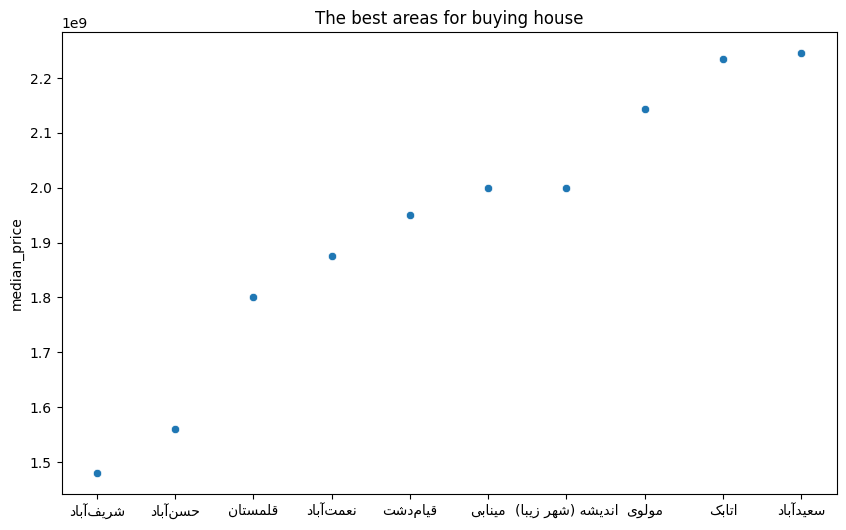

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(sort_low_budget.head(10),x=persian_labels,y='median_price')
plt.title(
    'The best areas for buying house'
)
plt.show()

In [64]:
address_list = sort_medium_budget.index.to_list()[:10]
persian_labels = [get_display(reshape(label)) for label in address_list]

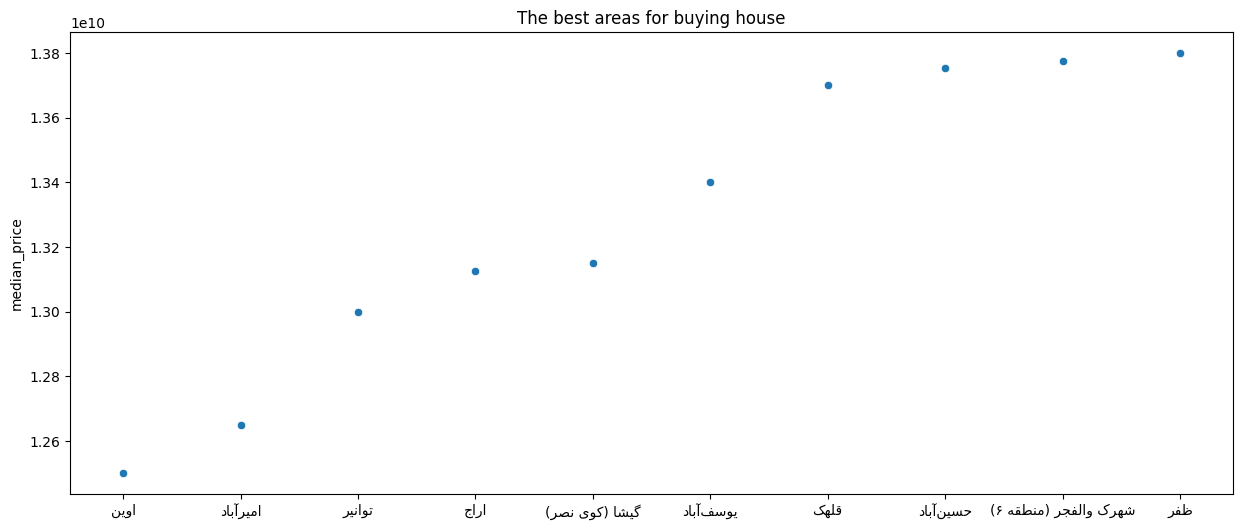

In [65]:
plt.figure(figsize=(15,6))
sns.scatterplot(sort_medium_budget.head(10),x=persian_labels,y='median_price')
plt.title(
    'The best areas for buying house'
)
plt.show()

In [196]:
address_list = sort_high_budget.index.to_list()[:10]
persian_labels = [get_display(reshape(label)) for label in address_list]

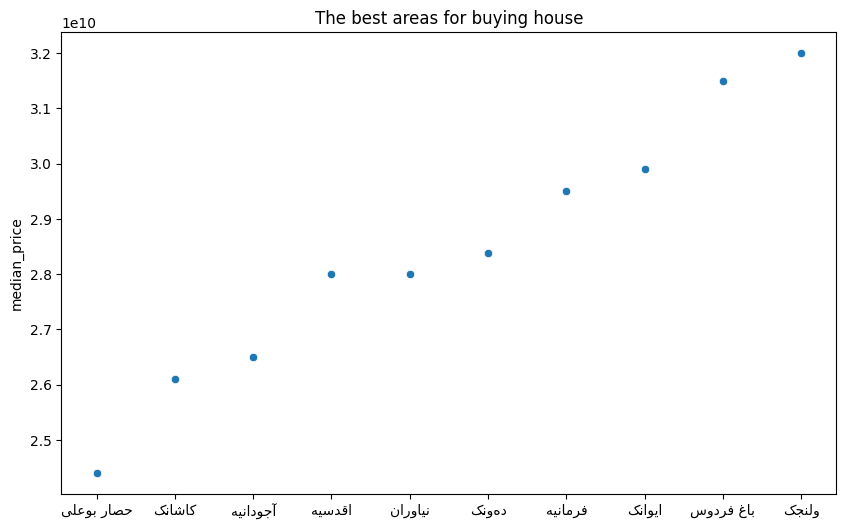

In [198]:
plt.figure(figsize=(10,6))
sns.scatterplot(sort_high_budget.head(10),x=persian_labels,y='median_price')
plt.title(
    'The best areas for buying house'
)
plt.show()

In [204]:
address_list = sort_very_high_budget.index.to_list()[:10]
persian_labels = [get_display(reshape(label)) for label in address_list]

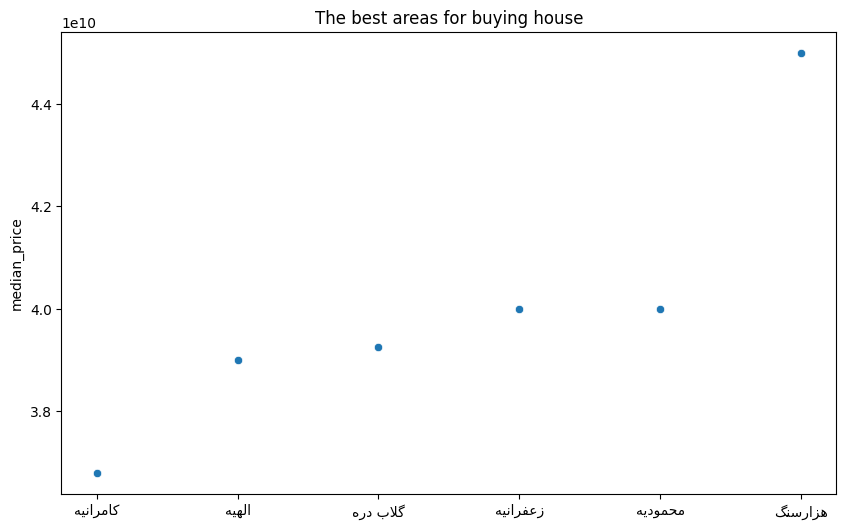

In [205]:
plt.figure(figsize=(10,6))
sns.scatterplot(sort_very_high_budget.head(10),x=persian_labels,y='median_price')
plt.title(
    'The best areas for buying house'
)
plt.show()

### Based on the ads for renting apartments and buying apartments in Dataset 2021, check the cost-effectiveness of renting in different neighborhoods

In [66]:
# Filter dataset on "apartment-rent" or "apartment-sell"
rent_sell_apartment = divar_2021[(divar_2021['sub_category']== 'apartment-rent') | (divar_2021['sub_category']== 'apartment-sell')].drop(columns=['rent','credit','Unnamed: 0'
,'balcony','agency','location']).dropna()

In [67]:
rent_sell_apartment

,district,token,sub_category,category,business_type,price,title,area,year,room,floor,elevator,parking,storage
0,پرند,AYlgrZxh,apartment-sell,residential-sell,personal,2.400000e+08,هسا فول واریزی,84.0,1399.0,2.0,3.0,False,True,True
7,نازی‌آباد,AYlcbIE5,apartment-sell,residential-sell,personal,1.400000e+09,آپارتمان ۵۳ متری هزاردستگاه.تک واحدی فول,53.0,1394.0,1.0,3.0,True,True,True
8,آذربایجان,AYckmcFP,apartment-sell,residential-sell,personal,1.580000e+09,70 متر، 2 پارکینگ، دوکله نور، فول، سلسبیل,70.0,1385.0,2.0,1.0,True,True,True
10,آهنگ,AYlo7UnY,apartment-sell,residential-sell,personal,7.000000e+08,خونه آهنگ,45.0,1382.0,1.0,5.0,True,False,True
12,جردن,AYlc7fd1,apartment-sell,residential-sell,personal,1.400000e+10,۲۰۰ متر جردن نوساز فروش و معاوضه,200.0,1399.0,3.0,5.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372218,اقدسیه,QXtbAUWI,apartment-sell,residential-sell,personal,1.020000e+10,اقدسیه صاحبقرانیه 302 مترچهار خوابه فول,302.0,1382.0,4.0,3.0,True,True,True
372233,نیاوران,gXWhm1mP,apartment-sell,residential-sell,personal,1.100000e+10,نیاوران مرجان 147 متری سه خوابه فول امکانات نوساز,147.0,1397.0,3.0,4.0,True,True,True
372263,پردیس,gX6QoxGb,apartment-sell,residential-sell,personal,5.500000e+08,فاز ۸ پردیس ۱۲۰ متری,120.0,1398.0,2.0,1.0,True,True,True
372294,شهرک غرب,QXiRxD6x,apartment-sell,residential-sell,personal,5.100000e+09,بلوار دریا،85 متر,85.0,1380.0,2.0,1.0,True,True,True


In [68]:
rent_aprt = divar_2021[(divar_2021['sub_category']== 'apartment-rent') 
                        & (divar_2021['category'] == 'residential-rent')
                        ].rename(columns={'district':'address'}).reset_index().drop(columns=['Unnamed: 0','balcony',
                       'agency','location','title','location','business_type',
                        'token','price','index']).dropna()

In [69]:
sell_aprt = divar_2021[(divar_2021['sub_category']== 'apartment-sell') 
                        & (divar_2021['category'] == 'residential-sell')
                        ].rename(columns={'district':'address'}).reset_index().drop(columns=['Unnamed: 0','balcony',
                       'agency','location','title','location','business_type',
                        'token','rent','credit','index']).dropna()

Here instead of rent, we use credit for all houses.

The formula we used for convert rent to credit is below:

In [70]:
rent_aprt['total_rent'] = rent_aprt[['rent','credit']].apply(lambda row : int(row['rent'] * 30 + row['credit']),axis=1)

In [71]:
rent_aprt.drop(columns=['rent','credit'],inplace=True)

In [72]:
rent_aprt.head()

,address,sub_category,category,area,year,room,floor,elevator,parking,storage,total_rent
0,قنات‌کوثر,apartment-rent,residential-rent,90.0,1395.0,2.0,1.0,True,True,True,350000000
1,سعادت‌آباد,apartment-rent,residential-rent,80.0,1398.0,2.0,4.0,True,True,True,570000000
2,سعادت‌آباد,apartment-rent,residential-rent,163.0,1397.0,3.0,3.0,True,True,True,1420000000
3,سعادت‌آباد,apartment-rent,residential-rent,100.0,1391.0,2.0,3.0,True,True,True,750000000
4,سعادت‌آباد,apartment-rent,residential-rent,180.0,1390.0,3.0,3.0,True,True,True,1060000000


In [73]:
sell_aprt['price'] = sell_aprt['price'].apply(lambda x:int(x))
sell_aprt.head()

,address,sub_category,category,price,area,year,room,floor,elevator,parking,storage
0,پرند,apartment-sell,residential-sell,240000000,84.0,1399.0,2.0,3.0,False,True,True
1,نازی‌آباد,apartment-sell,residential-sell,1400000000,53.0,1394.0,1.0,3.0,True,True,True
2,آذربایجان,apartment-sell,residential-sell,1580000000,70.0,1385.0,2.0,1.0,True,True,True
4,آهنگ,apartment-sell,residential-sell,700000000,45.0,1382.0,1.0,5.0,True,False,True
6,جردن,apartment-sell,residential-sell,14000000000,200.0,1399.0,3.0,5.0,True,True,True


We get average rent and price of houses for each areas

In [74]:
avg_credit_aprt = rent_aprt.groupby('address')['total_rent'].mean().reset_index().rename(columns={'total_rent':'avg_total_rent'})
avg_sell_aprt = sell_aprt.groupby('address')['price'].mean().reset_index().rename(columns={'price':'avg_price'})

In [75]:
# merge dataset and use inner join
merge_dataset = pd.merge(avg_credit_aprt,avg_sell_aprt,on=['address'],how='inner')

To find the best areas for renting house, We calculated the ration rant to sell

In [76]:
merge_dataset['ratio_rent_to_sell'] = round(merge_dataset['avg_total_rent'] / merge_dataset['avg_price'],2) * 100

In [77]:
merge_dataset.sort_values(by='ratio_rent_to_sell',inplace=True)

In [78]:
merge_dataset = merge_dataset.reset_index().drop(columns=['index'])

In [79]:
top_20 = merge_dataset.head(20)

In [82]:
top_20

,address,avg_total_rent,avg_price,ratio_rent_to_sell
0,سرخه حصار,1.400000e+08,8.500000e+09,2.0
1,دربند,5.246875e+08,2.255470e+10,2.0
2,فیروزآبادی,2.125000e+08,6.123620e+09,3.0
3,شهرک فرهنگیان,7.000000e+07,2.404000e+09,3.0
4,قیام,1.514286e+08,4.315400e+09,4.0
5,توحید,2.796216e+08,6.798443e+09,4.0
6,آرارات,8.160000e+08,2.315067e+10,4.0
7,شهرک غزالی,1.800000e+08,4.413500e+09,4.0
8,شهرک دانشگاه تهران,1.068750e+08,2.776891e+09,4.0
9,شهرک دریا,1.050000e+08,2.267500e+09,5.0


In [83]:
address_list = top_20['address'].to_list()
persian_labels = [get_display(reshape(label)) for label in address_list]
text = get_display(reshape('نسبت اجاره به خرید'))


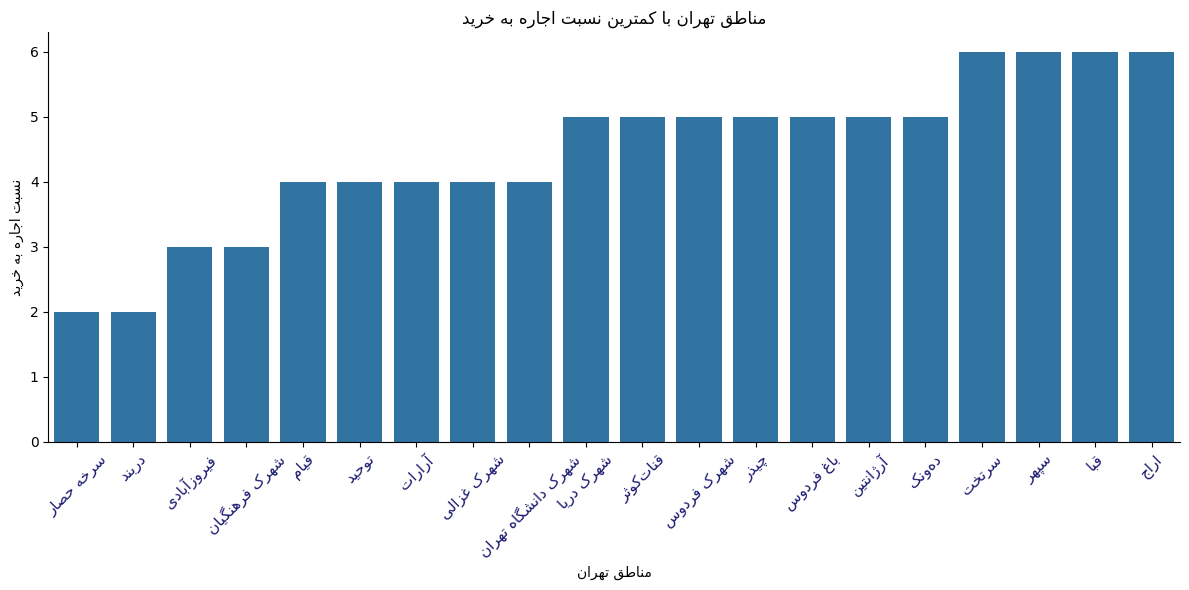

In [84]:
plt.figure(figsize=(12, 6))
sns.light_palette("seagreen")
sns.barplot(x=persian_labels, y='ratio_rent_to_sell', data=top_20)
plt.title(get_display(reshape('مناطق تهران با کمترین نسبت اجاره به خرید')))
plt.xlabel(get_display(reshape('مناطق تهران')))
plt.ylabel(text)
plt.xticks(rotation=45)
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='midnightblue',size=11)
plt.tight_layout()
plt.show()

We find the first 20 areas with the best areas for renting house.
The less ratio rent to sell, the best areas to rent

Now we check the areas with highest ratio rent to sell

In [85]:
tail_20 = merge_dataset.tail(20).sort_values(by='ratio_rent_to_sell',ascending=False).reset_index().drop(columns=['index'])

In [86]:
address_list = tail_20['address'].to_list()
persian_labels = [get_display(reshape(label)) for label in address_list]
# text = get_display(reshape('نسبت اجاره به خرید'))


C:\Users\armin\AppData\Local\Temp\ipykernel_2280\384988181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=persian_labels, y='ratio_rent_to_sell', data=tail_20,palette=pal[::-1])


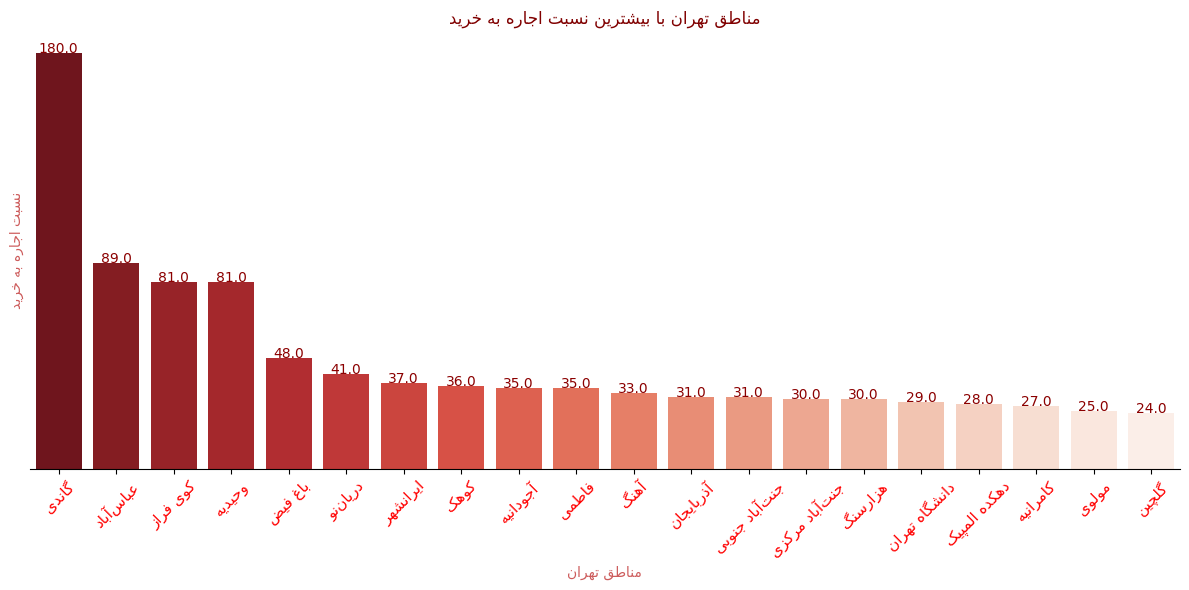

In [87]:
plt.figure(figsize=(12, 6))
pal = sns.color_palette('Reds',len(tail_20))
sns.barplot(x=persian_labels, y='ratio_rent_to_sell', data=tail_20,palette=pal[::-1])
plt.title(get_display(reshape('مناطق تهران با بیشترین نسبت اجاره به خرید')),color='Maroon')
plt.xlabel(get_display(reshape('مناطق تهران')),color='IndianRed')
plt.ylabel(text,color='IndianRed')
plt.gca().spines[['top','right','left']].set_visible(False)
plt.xticks(color='Red',size=11,rotation=45)
plt.yticks([])
for i in range(len(tail_20)):
    plt.text(i,tail_20['ratio_rent_to_sell'][i],round(tail_20['ratio_rent_to_sell'][i],2),ha='center',color='DarkRed')
plt.tight_layout()
plt.show()

It seems there are some outliers in the dataset for "Gandi" area, because the ratio is abnormal.